In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Loading the dataset

In [ ]:
dataset=pd.read_csv("/content/drive/MyDrive/US-Accidents.csv")

In [4]:
target = "Severity"

# Exploritory analysis

## Limiting the dataset
The dataset is quite large.

The dataset should be limited to a smaller selection, that is representative of the whole dataset.

We can use stratified for getting a representative selection. Stratified sampling keeps the targets distribution when splitting that dataset,

We will limit the dataset to 5000.000 rows.

In [ ]:
from sklearn.model_selection import train_test_split
if target not in dataset.columns:
    _, dataset_sample = train_test_split(dataset, test_size=5000, random_state=42)
else:
    _, dataset_sample = train_test_split(dataset, test_size=5000, stratify=dataset[target], random_state=42)

dataset_sample.to_csv('limited.csv', index=False)

In [5]:
dataset_sample=pd.read_csv("/content/drive/MyDrive/limited.csv")

## Feature types
The dataset's features needs to be converted into their appropriate types.

This will make it easier to handle the dataset, and help the models better understand the features.

In [6]:
dataset_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 46 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     5000 non-null   object 
 1   Source                 5000 non-null   object 
 2   Severity               5000 non-null   int64  
 3   Start_Time             5000 non-null   object 
 4   End_Time               5000 non-null   object 
 5   Start_Lat              5000 non-null   float64
 6   Start_Lng              5000 non-null   float64
 7   End_Lat                2792 non-null   float64
 8   End_Lng                2792 non-null   float64
 9   Distance(mi)           5000 non-null   float64
 10  Description            5000 non-null   object 
 11  Street                 4996 non-null   object 
 12  City                   5000 non-null   object 
 13  County                 5000 non-null   object 
 14  State                  5000 non-null   object 
 15  Zipc

The features have to be given appropriate feature types, and grouped in order to be easily handled.

In [7]:
object_cols = dataset_sample.select_dtypes(include=['object']).columns

dataset_sample[object_cols] = dataset_sample[object_cols].astype('category')

dataset_sample["Description"] = dataset_sample["Description"].astype('string')

datetime_feature_names = ["Start_Time", "End_Time", "Weather_Timestamp"]
for feature_name in datetime_feature_names:
    dataset_sample[feature_name] = pd.to_datetime(dataset_sample[feature_name], format='%Y-%m-%d %H:%M:%S', errors='coerce')

datetime_cols = dataset_sample.select_dtypes(include=['datetime64[ns]']).columns.tolist()
cat_cols = dataset_sample.select_dtypes(include=['category']).columns.tolist()
bool_cols = dataset_sample.select_dtypes(include=['bool']).columns.tolist()
num_cols = dataset_sample.select_dtypes(include=['float', 'int']).columns.tolist()
string_cols = dataset_sample.select_dtypes(include=['string']).columns.tolist()

In [8]:
dataset_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 46 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     5000 non-null   category      
 1   Source                 5000 non-null   category      
 2   Severity               5000 non-null   int64         
 3   Start_Time             4541 non-null   datetime64[ns]
 4   End_Time               4541 non-null   datetime64[ns]
 5   Start_Lat              5000 non-null   float64       
 6   Start_Lng              5000 non-null   float64       
 7   End_Lat                2792 non-null   float64       
 8   End_Lng                2792 non-null   float64       
 9   Distance(mi)           5000 non-null   float64       
 10  Description            5000 non-null   string        
 11  Street                 4996 non-null   category      
 12  City                   5000 non-null   category      
 13  Cou

## Features
Let's see what the features look like

In [9]:
pd.set_option('display.max_columns', None)
print(dataset_sample.head(10))

          ID   Source  Severity          Start_Time            End_Time  \
0  A-5994002  Source1         2 2021-12-01 08:56:05 2021-12-01 11:03:00   
1  A-6966166  Source1         4 2020-09-22 15:36:00 2020-09-22 16:51:00   
2  A-1423603  Source2         2 2020-08-14 06:12:23 2020-08-14 07:11:20   
3  A-6951260  Source1         2 2020-12-17 02:17:16 2020-12-17 04:37:56   
4  A-1104970  Source2         3 2021-03-26 18:57:33 2021-03-26 19:58:08   
5  A-2809563  Source2         2 2018-05-08 13:36:19 2018-05-08 14:06:12   
6  A-7115082  Source1         2 2020-03-13 19:37:00 2020-03-13 21:09:44   
7  A-7206244  Source1         2 2020-02-29 23:01:00 2020-03-01 00:14:07   
8  A-1380057  Source2         2 2020-07-07 06:05:25 2020-07-07 09:02:24   
9  A-3193834  Source2         3 2017-11-19 16:51:42 2017-11-19 17:21:25   

   Start_Lat   Start_Lng    End_Lat     End_Lng  Distance(mi)  \
0  30.445285  -81.719904  30.456724  -81.700802         1.385   
1  34.347994  -83.314498  34.346604  -83.318

### Conclusions
- The date features for dates need to be split up. One feature for the date, and one feature for the time.
- The minute and second for the time features can be cut out. I think it's better to convert the this hour feature to rather be a category for what time of the day it is: early-morning, mid-day, or late night.
- The descriptions can be handled using vectorization like TF-IDF.
- I can handle the categories and boolean values by using one-hot encoding.

## Handling null values

In [10]:
null_count = dataset_sample.isnull().sum()

total_rows = len(dataset_sample)
null_percentage = (null_count / total_rows) * 100

null_df = pd.DataFrame({'Null Count': null_count, 'Null Percentage': null_percentage})
print(null_df)

                       Null Count  Null Percentage
ID                              0             0.00
Source                          0             0.00
Severity                        0             0.00
Start_Time                    459             9.18
End_Time                      459             9.18
Start_Lat                       0             0.00
Start_Lng                       0             0.00
End_Lat                      2208            44.16
End_Lng                      2208            44.16
Distance(mi)                    0             0.00
Description                     0             0.00
Street                          4             0.08
City                            0             0.00
County                          0             0.00
State                           0             0.00
Zipcode                         1             0.02
Country                         0             0.00
Timezone                        5             0.10
Airport_Code                   

- In many of of these features, the amount of null values is so low that they can be dealt with by making them simply hold value like 0 or a own category.
- It's a bit suspicious that some of the features have the exact same amount of null values. Perhaps they have the null values at the same rows. This should be investigated further
- Some features have more than 9% null values. This is a bit high.

In [11]:
features_to_check = ["Sunrise_Sunset", "Civil_Twilight", "Nautical_Twilight", "Astronomical_Twilight"]
df_with_nulls = dataset_sample[dataset_sample['Sunrise_Sunset'].isnull()]
df_with_nulls[features_to_check].info()

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, 579 to 4910
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Sunrise_Sunset         0 non-null      category
 1   Civil_Twilight         0 non-null      category
 2   Nautical_Twilight      0 non-null      category
 3   Astronomical_Twilight  0 non-null      category
dtypes: category(4)
memory usage: 652.0 bytes


Here we see the 4 lowest features have the same amount of null values, in a dataframe that is specified to only rows where Sunrise_Sunset has null values.
This means that these features have null values at the exact same positions:
Sunrise_Sunset, Civil_Twilight, Nautical_Twilight, Astronomical_Twilight

In [12]:
features_to_check = ["End_Lat", "End_Lng"]
df_with_nulls = dataset_sample[dataset_sample['End_Lat'].isnull()]
df_with_nulls[features_to_check].info()

<class 'pandas.core.frame.DataFrame'>
Index: 2208 entries, 2 to 4996
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   End_Lat  0 non-null      float64
 1   End_Lng  0 non-null      float64
dtypes: float64(2)
memory usage: 51.8 KB


End_Lat and End_Lng have null values at the exact same rows.

In [13]:
features_to_check = ["Start_Time", "End_Time"]
df_with_nulls = dataset_sample[dataset_sample['Start_Time'].isnull()]
df_with_nulls[features_to_check].info()

<class 'pandas.core.frame.DataFrame'>
Index: 459 entries, 20 to 4978
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Start_Time  0 non-null      datetime64[ns]
 1   End_Time    0 non-null      datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 10.8 KB


Start_Time and End_Time have null values at the exact same rows.

### Conclusions
Some of the features have null values at the exact same rows. I don't think this in itself is a problem.
It would've been a problem if close to a majority if the features would've been null at the exact same rows.
Then it could've been discussed if the rows should've been removed. But that's not nessecary.
End_Lat and End_Lng have a lot of null values. But I'll keep these features too.

- The numerical features will have their null values turned into 0.
- The boolean features will have their null values turned into false.
- The categorical have few null values, so these will be merged with the most frequent category.
- The datetime features will later be encoded into numerical values. I think it's appropriate then to turn the null datetime values into 0.

!Tydeligvis kan man bruke clustering, eks kmeans for å finne en passende manglende verdi! - Men dette er kanskje best som en egen kaggle?

## Distribution analysis
...

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_numeric_features(df, numeric_features):
    df[numeric_features] = df[numeric_features].apply(pd.to_numeric, errors='coerce')
    df[numeric_features].fillna(0)
    num_cols = len(numeric_features)
    fig, axs = plt.subplots(num_cols, 2, figsize=(12, num_cols*6))

    for i, feature in enumerate(numeric_features):
        # Histogram
        axs[i, 0].hist(df[feature], bins=20, color='skyblue', edgecolor='black')
        axs[i, 0].set_title(f'{feature} Histogram')
        axs[i, 0].set_xlabel(feature)
        axs[i, 0].set_ylabel('Frequency')

        # Boxplot
        axs[i, 1].boxplot(df[feature], vert=True)
        axs[i, 1].set_title(f'{feature} Boxplot')
        axs[i, 1].set_xlabel(feature)

    plt.tight_layout()
    plt.show()


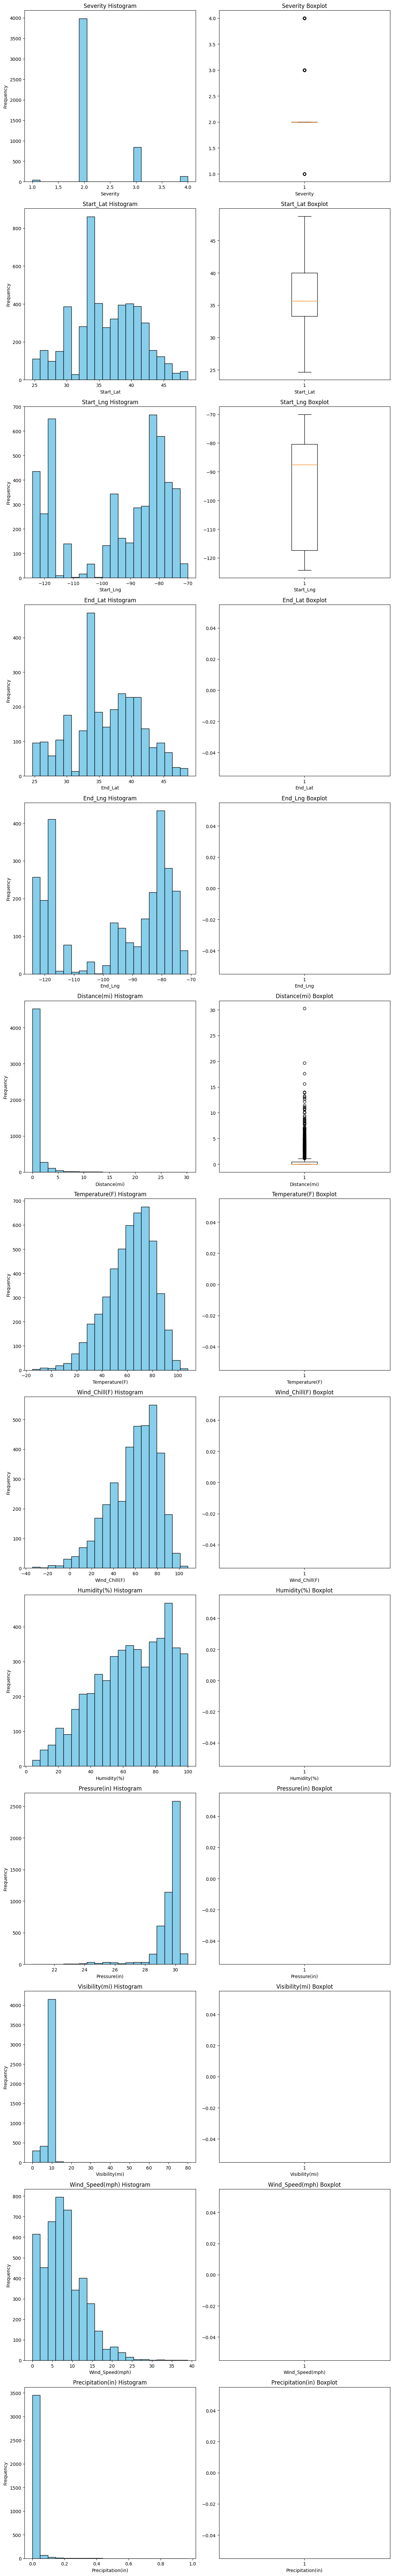

In [15]:
plot_numeric_features(dataset_sample, num_cols)

These look like they might have outliers:
Precipitation, Wind_speed, Visibility, Distance
- This can be handled by normalization

In [16]:
def plot_boolean_features(df, bool_features):
    # Calculate the number of rows and columns for subplots
    num_features = len(bool_features)
    num_rows = num_features // 2 + num_features % 2
    num_cols = 2

    # Create subplots with rectangular shape
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 30))

    # Flatten the axes array to make it easier to iterate
    axes = axes.flatten()

    # Plot boolean counts for specified features
    for i, feature in enumerate(bool_features):
        counts = df[feature].value_counts()
        counts.plot(kind='bar', ax=axes[i])
        axes[i].set_title(f'Boolean counts for {feature}')
        axes[i].set_xlabel('Value')
        axes[i].set_ylabel('Count')

    # Hide empty subplots
    for j in range(num_features, num_rows * num_cols):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

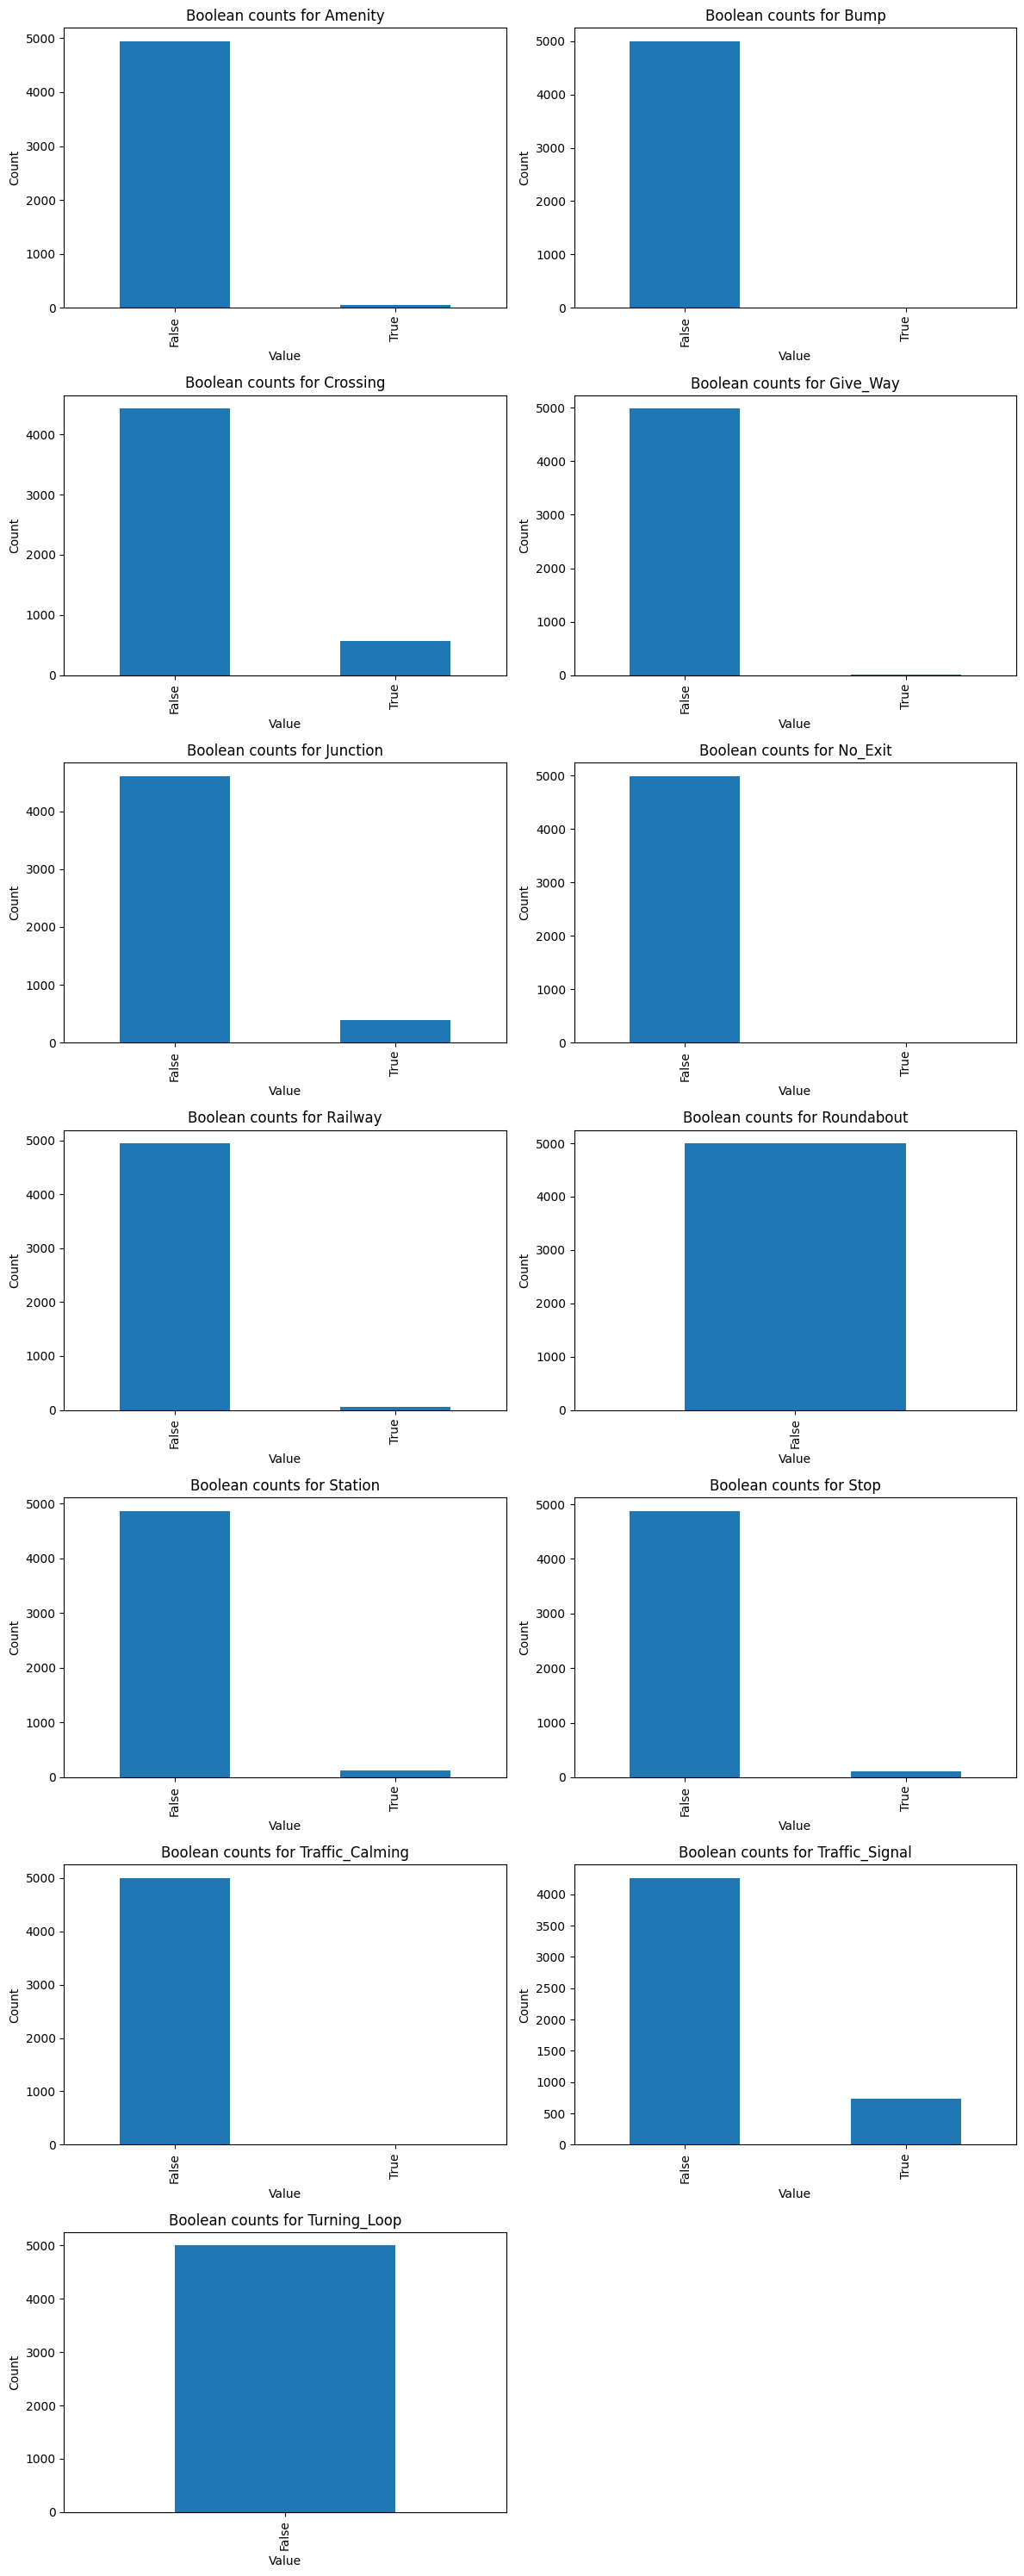

In [17]:
plot_boolean_features(dataset_sample, bool_cols)

In all these cases, the false values is in a lot more instances than the true value.

In [18]:
for column in dataset_sample[bool_cols].columns:
    true_percentage = dataset_sample[column].mean() * 100
    false_percentage = 100 - true_percentage

    print(column)
    print(f"Percentage of True: {true_percentage:.2f}%")
    print(f"Percentage of False: {false_percentage:.2f}%")
    print()

Amenity
Percentage of True: 1.10%
Percentage of False: 98.90%

Bump
Percentage of True: 0.04%
Percentage of False: 99.96%

Crossing
Percentage of True: 11.42%
Percentage of False: 88.58%

Give_Way
Percentage of True: 0.32%
Percentage of False: 99.68%

Junction
Percentage of True: 7.78%
Percentage of False: 92.22%

No_Exit
Percentage of True: 0.18%
Percentage of False: 99.82%

Railway
Percentage of True: 1.08%
Percentage of False: 98.92%

Roundabout
Percentage of True: 0.00%
Percentage of False: 100.00%

Station
Percentage of True: 2.54%
Percentage of False: 97.46%

Stop
Percentage of True: 2.36%
Percentage of False: 97.64%

Traffic_Calming
Percentage of True: 0.06%
Percentage of False: 99.94%

Traffic_Signal
Percentage of True: 14.80%
Percentage of False: 85.20%

Turning_Loop
Percentage of True: 0.00%
Percentage of False: 100.00%



For many of these features, there are a lot more instances of false, than true.

Turning_Loop has only false values. Maby there were a few true values in the original dataset (which the dataset_sample is taken from).

These features have especially many false values compared to true: Turning_Loop, Traffic_Calming, Roundabout, Railway, Give_way, Bump.

Only Traffic_Signal, Junction, and Crossing have an amount of True values over 3% of all values.

....

In [19]:
def plot_top_categories(df, cat_features):
    # Calculate the number of rows and columns for subplots
    num_features = len(df[cat_features].columns)
    num_rows = num_features // 2 + num_features % 2
    num_cols = 2

    # Create subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 50))

    # Flatten the axes array to make it easier to iterate
    axes = axes.flatten()

    # Plot top categories for each categorical feature
    for i, column in enumerate(df[cat_features].columns):
        top_categories = df[column].value_counts().nlargest(50)
        top_categories.plot(kind='bar', ax=axes[i])
        axes[i].set_title(f'Top categories for {column}')
        axes[i].set_xlabel('Category')
        axes[i].set_ylabel('Count')

    # Hide empty subplots
    for j in range(num_features, num_rows * num_cols):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()


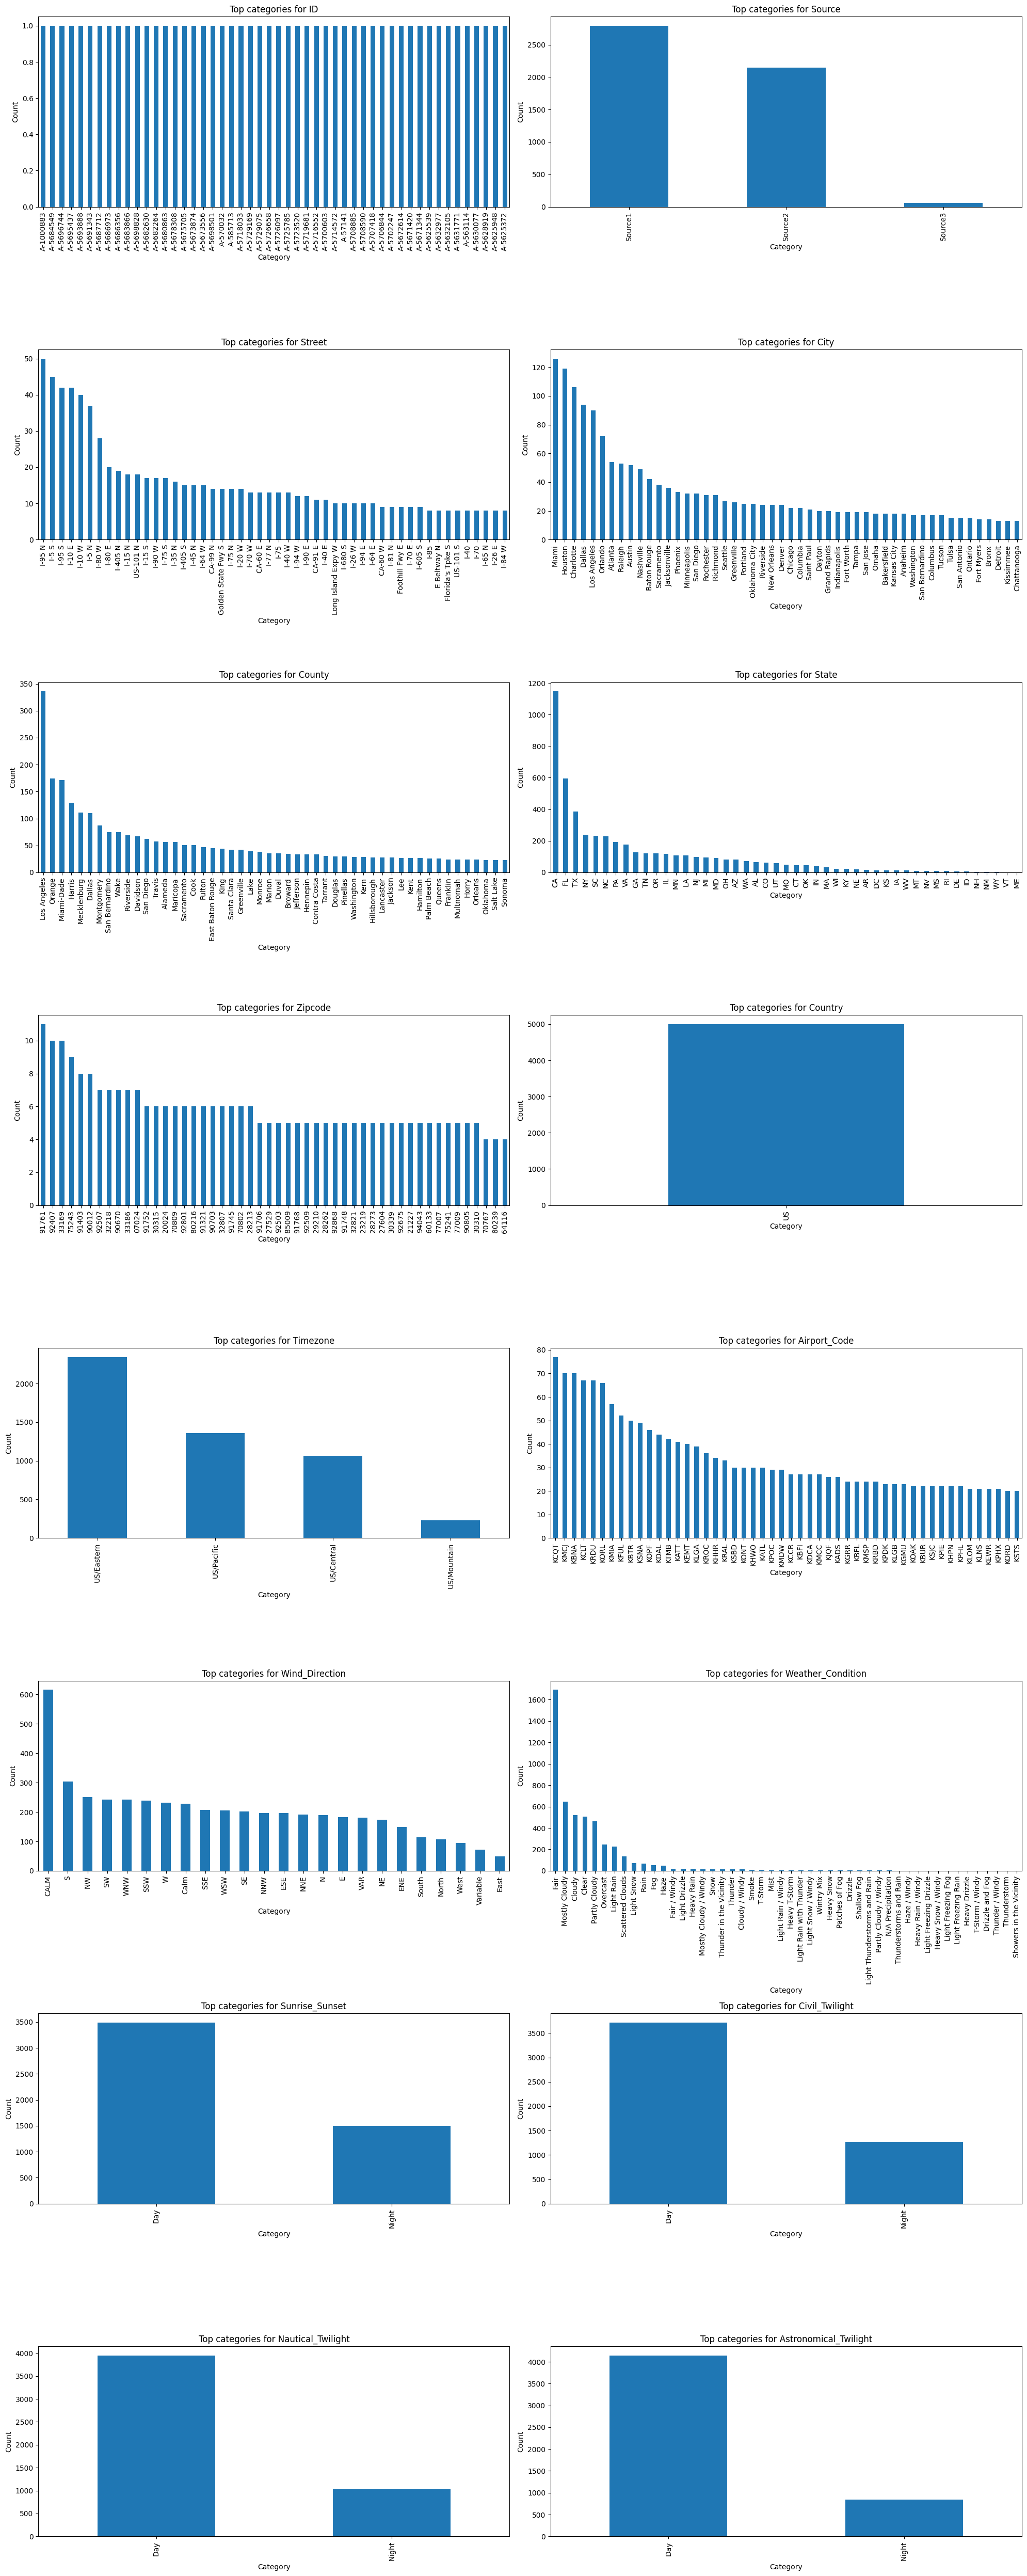

In [20]:
plot_top_categories(dataset_sample, cat_cols)

ID feature can be cut out. It only has unique values.

Tne same goes for Country. Every instance is from the US.

Weather_Condition has a lot of categories.

This is because the weather types can be of different strenghts (a lot of rain, and just a bit of rain). It also comes several wather types for some values (Ex "Mostly Cloudy / Windy"). This results in a lot of categories being little used. Maby it's better to create more features for the weater_condition, that combine several categories. For eaxmple there could be a boolean feature called "Windy", that has a boolean feature for wether it was windy. Or a categorical value for how windy it was (ex Very windy, windy, a little windy, not windy).

In [21]:
def plot_years(df, date_feature):
# Create DataFrame
    df_c = df.copy()

    # Extract years from datetime column
    df_c['Date'] = df[date_feature].dt.date

    # Count occurrences of each year
    year_counts = df[date_feature].dt.year.value_counts().sort_index()

    # Plot histogram
    plt.figure(figsize=(10, 6))
    year_counts.plot(kind='bar', color='skyblue')
    plt.title('Histogram of dates')
    plt.xlabel('Day')
    plt.ylabel('Count')

    # Get the positions and labels of the x-ticks
    plt.xticks(ticks=range(len(year_counts.index)), labels=year_counts.index, rotation=45)

    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

def plot_time(df, date_feature):
    df_c = df.copy()
    # Extract dates from datetime column
    df_c['Date'] = df[date_feature].dt.date

    # Count occurrences of each date
    date_counts = df_c['Date'].value_counts().sort_index()

    # Plot histogram
    plt.figure(figsize=(10, 6))
    date_counts.plot(kind='bar', color='skyblue')
    plt.title('Histogram of Dates')
    plt.xlabel('Date')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

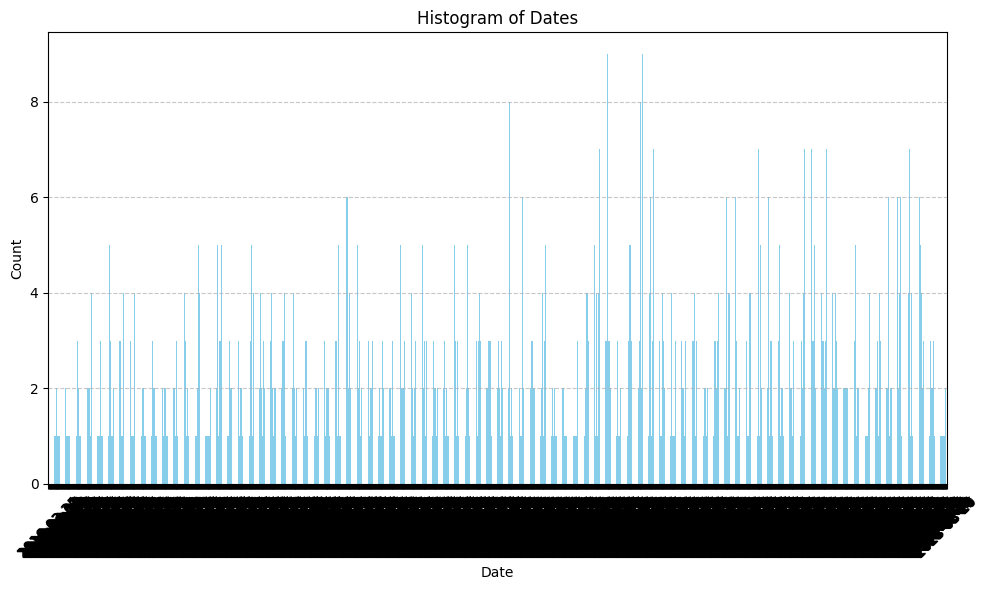

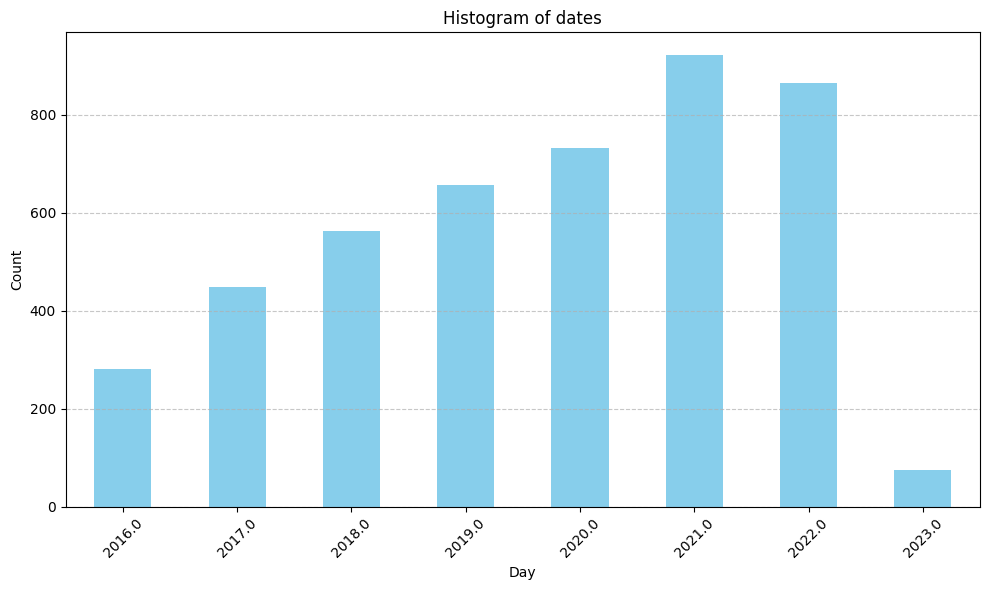

In [22]:
plot_time(dataset_sample, "Start_Time")
plot_years(dataset_sample, "Start_Time")

We see most accidents happend in 2021.

In [23]:
earliest_date = dataset_sample["Start_Time"].min()
latest_date = dataset_sample['Start_Time'].max()

print("Earliest Date:", earliest_date)
print("Latest Date:", latest_date)

Earliest Date: 2016-03-24 20:45:59
Latest Date: 2023-03-30 08:57:30


The data for 2016 only starts a bit into the year. But still not far enough that the should be substantiually less data.
So there was just a lot fewer car accidents in 2016 than in then following years.

The dataset ends in early 2023, so thats why 2023 has a lot less incidents.

...

In [24]:
import seaborn as sns


def plot_scatter_longitude_latitude(df, longitude_feature, latitude_feature):
    plt.figure(figsize=(10, 6))
    plt.scatter(df[longitude_feature], df[latitude_feature], alpha=0.5)
    plt.xlabel(longitude_feature)
    plt.ylabel(latitude_feature)
    plt.title(latitude_feature)
    plt.grid(True)
    plt.show()

def plot_scatter_with_category(df, longitude_feature, latitude_feature, category_feature):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=longitude_feature, y=latitude_feature, hue=category_feature, palette='Set1', alpha=0.7)
    plt.xlabel(longitude_feature)
    plt.ylabel(latitude_feature)
    plt.title(category_feature)
    plt.legend(title=category_feature)
    plt.grid(True)
    plt.show()

def plot_scatter_with_buckets(df, longitude_feature, latitude_feature, numerical_feature):
    # Discretize the numerical feature into 5 buckets
    df_c = df.copy()
    df_c['bucket'] = pd.cut(df[numerical_feature], bins=5, labels=['Bucket 1', 'Bucket 2', 'Bucket 3', 'Bucket 4', 'Bucket 5'])

    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_c, x=longitude_feature, y=latitude_feature, hue='bucket', palette='Set1', alpha=0.7)
    plt.xlabel(longitude_feature)
    plt.ylabel(latitude_feature)
    plt.title(numerical_feature)
    plt.legend(title='Numerical Bucket')
    plt.grid(True)
    plt.show()

def plot_scatter_with_separate_plots(df, longitude_feature, latitude_feature, category_feature):
    # Get unique labels in the categorical feature
    unique_labels = df[category_feature].unique()

    # Create separate plots for each label
    for label in unique_labels:
        plt.figure(figsize=(10, 6))
        subset_df = df[df[category_feature] == label]
        sns.scatterplot(data=subset_df, x=longitude_feature, y=latitude_feature, alpha=0.7)
        plt.xlabel(longitude_feature)
        plt.ylabel(latitude_feature)
        plt.title(f'{category_feature}: {label}')
        plt.grid(True)
        plt.show()

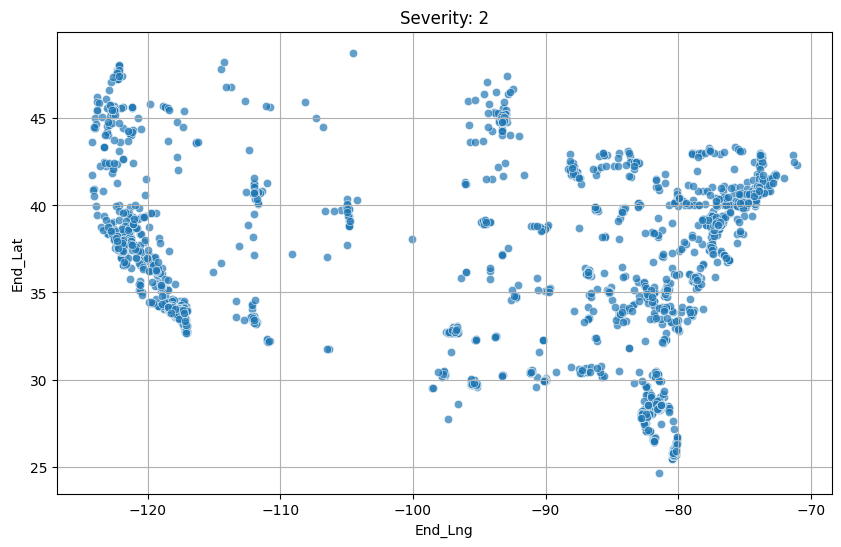

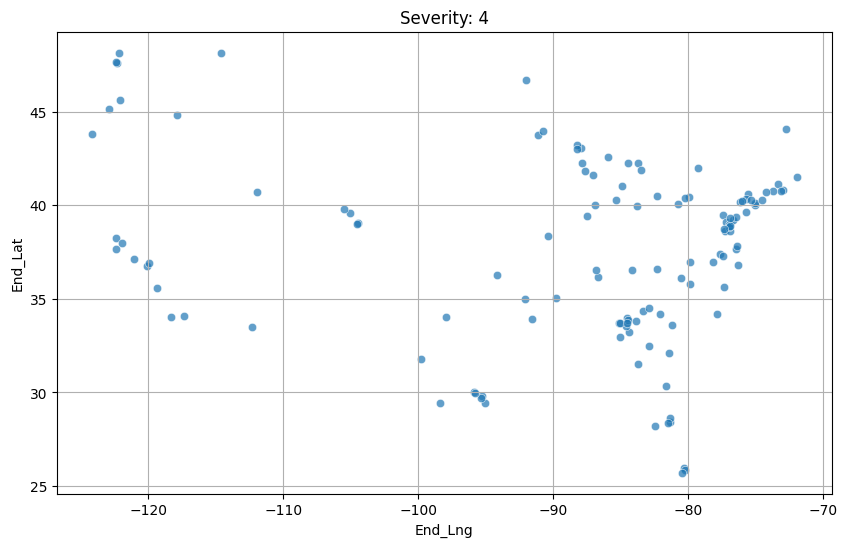

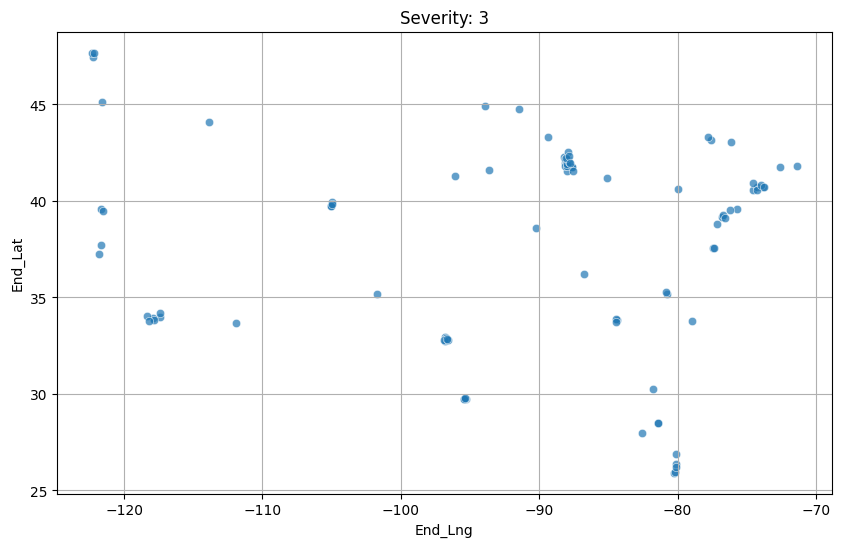

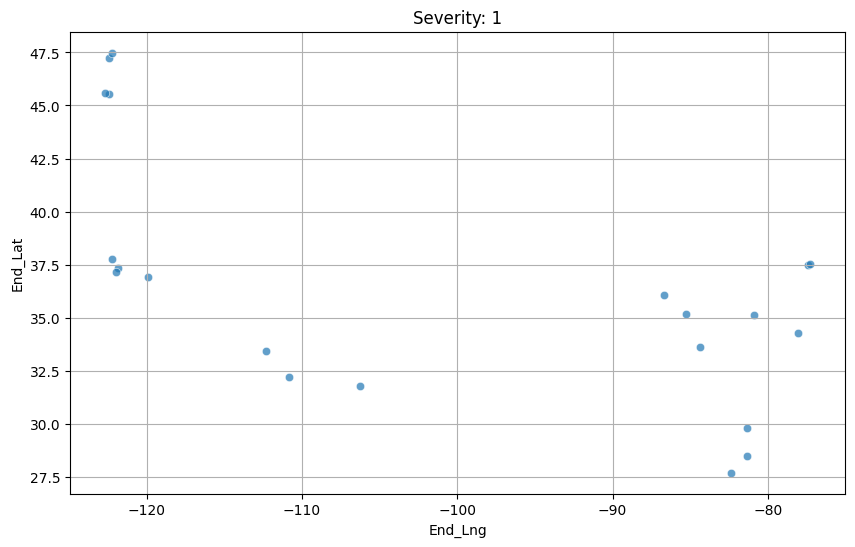

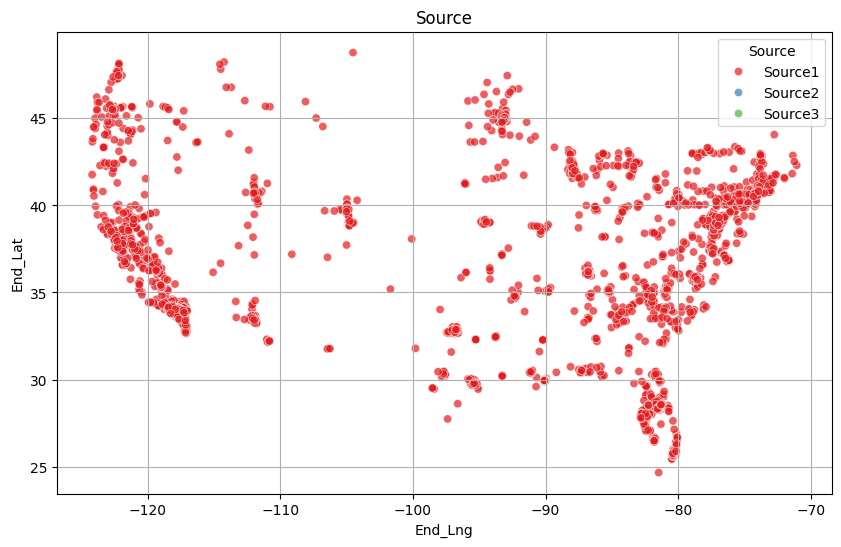

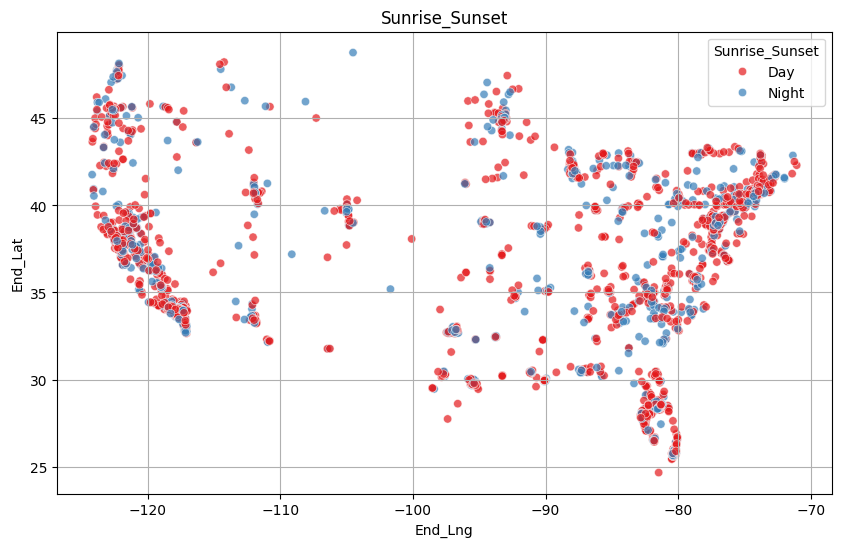

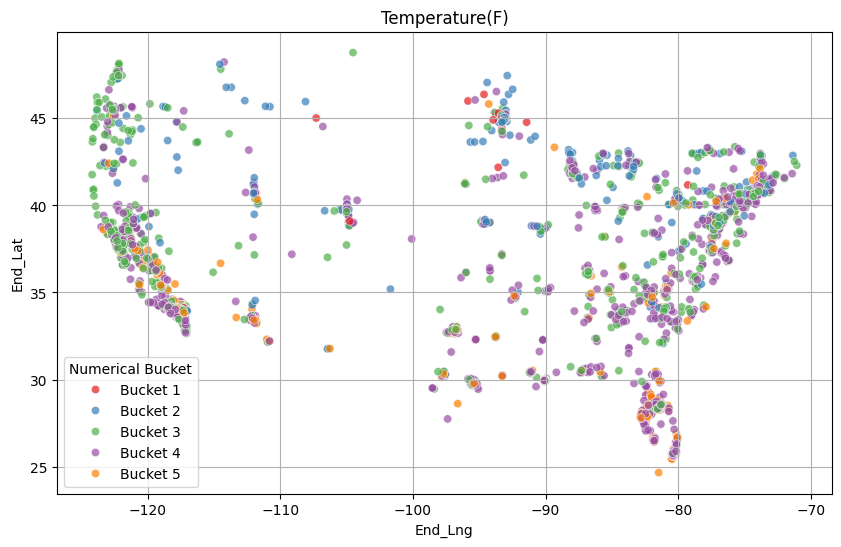

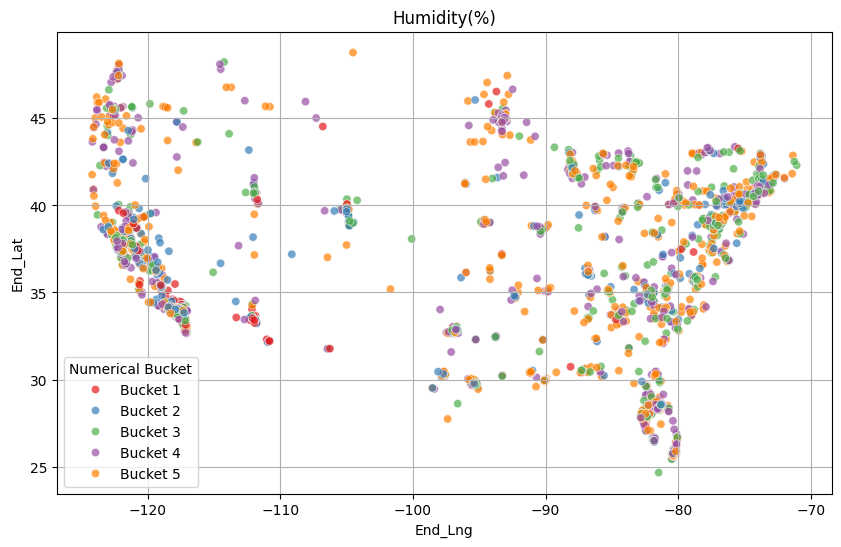

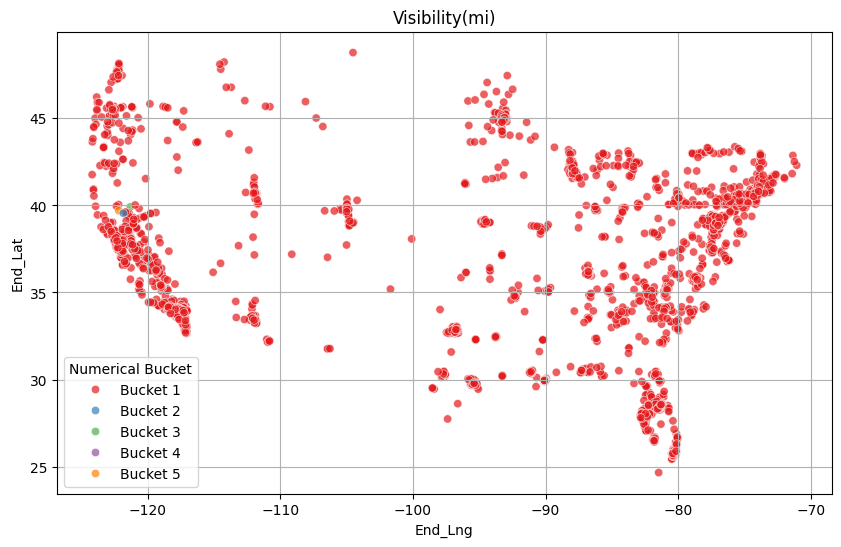

In [25]:
plot_scatter_with_separate_plots(dataset_sample, "End_Lng", "End_Lat", target)
plot_scatter_with_category(dataset_sample, "End_Lng", "End_Lat", "Source")
plot_scatter_with_category(dataset_sample, "End_Lng", "End_Lat", "Sunrise_Sunset")
plot_scatter_with_buckets(dataset_sample, "End_Lng", "End_Lat", "Temperature(F)")
plot_scatter_with_buckets(dataset_sample, "End_Lng", "End_Lat", "Humidity(%)")
plot_scatter_with_buckets(dataset_sample, "End_Lng", "End_Lat", "Visibility(mi)")

If we use the longitude and latitude values, we will get a map over the US for where each instance happend.
We can then color the instances after some feature value, to get additional information.
For numerical features the values are splot into buckets.

There dosent seem to be some pattern here where a feature is more likely to have a value if its at a certain coordinate.
We see that most instances are along the coast and in big cities, which is not suprising considering these areas have the highest populations.





In [26]:
dataset_sample.describe()

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,5000.000000,4541,4541,5000.000000,5000.000000,2792.000000,2792.000000,5000.000000,4913,4887.000000,3689.000000,4883.000000,4903.000000,4886.000000,4627.000000,3592.000000
mean,2.212200,2020-03-22 08:46:33.059237888,2020-03-22 14:30:55.901343232,36.097704,-94.571147,36.135491,-95.572008,0.519621,2020-05-30 16:10:15.473234432,61.982668,58.893684,64.796846,29.563388,9.134787,7.628290,0.006871
min,1.000000,2016-03-24 20:45:59,2016-03-24 21:15:59,24.662273,-124.214546,24.662678,-124.206350,0.000000,2016-03-25 17:54:00,-15.000000,-34.000000,4.000000,20.550000,0.000000,0.000000,0.000000
25%,2.000000,2018-10-03 10:16:37,2018-10-03 10:46:09,33.285758,-117.306307,33.354678,-117.808150,0.000000,2018-12-03 16:52:00,50.000000,44.000000,48.000000,29.390000,10.000000,4.600000,0.000000
50%,2.000000,2020-06-23 03:53:00,2020-06-23 04:26:04,35.644962,-87.514453,36.016696,-87.871715,0.029000,2020-11-07 20:56:00,64.000000,63.000000,67.000000,29.860000,10.000000,7.000000,0.000000
75%,2.000000,2021-10-29 16:43:00,2021-10-29 19:53:38,40.020998,-80.371319,40.129649,-80.293082,0.453250,2022-01-18 18:53:00,76.000000,76.000000,84.000000,30.040000,10.000000,10.400000,0.000000
max,4.000000,2023-03-30 08:57:30,2023-03-30 10:48:30,48.767906,-70.000351,48.768684,-71.052620,30.247000,2023-03-30 08:55:00,108.000000,108.000000,100.000000,30.820000,80.000000,39.000000,0.970000
std,0.487461,NaN,NaN,5.065855,17.357253,5.326794,18.090558,1.358131,NaN,18.735584,22.111054,22.674570,0.965660,2.857919,5.207713,0.039295


These features seem to have a outliers:

Distance(mi)

We also saw the same thing when using histograms. There was only one big column, while the plot reach far out along the x-axis.

We can use normalization to fix the outliers.

We should also check the amount of rare categories in the categorical data.

If there are a lot of rare values, then it is likely that the category will give an error, because the category will be present in the training data, but not the test data.

In [27]:
total_samples = len(dataset_sample)
rare_category_counts = {}

for feature in dataset_sample[cat_cols].columns:
    category_counts = dataset_sample[feature].value_counts(normalize=True)
    rare_categories = category_counts[category_counts < 0.01]
    total_rare_percentage = rare_categories.sum() * 100
    rare_category_counts[feature] = total_rare_percentage

for feature, percentage in rare_category_counts.items():
    print(f"Feature '{feature}': {percentage:.2f}% of categories are rare (<1%) throughout the dataset.")


Feature 'ID': 100.00% of categories are rare (<1%) throughout the dataset.
Feature 'Source': 0.00% of categories are rare (<1%) throughout the dataset.
Feature 'Street': 99.00% of categories are rare (<1%) throughout the dataset.
Feature 'City': 84.68% of categories are rare (<1%) throughout the dataset.
Feature 'County': 65.26% of categories are rare (<1%) throughout the dataset.
Feature 'State': 7.98% of categories are rare (<1%) throughout the dataset.
Feature 'Zipcode': 100.00% of categories are rare (<1%) throughout the dataset.
Feature 'Country': 0.00% of categories are rare (<1%) throughout the dataset.
Feature 'Timezone': 0.00% of categories are rare (<1%) throughout the dataset.
Feature 'Airport_Code': 88.45% of categories are rare (<1%) throughout the dataset.
Feature 'Wind_Direction': 0.00% of categories are rare (<1%) throughout the dataset.
Feature 'Weather_Condition': 4.45% of categories are rare (<1%) throughout the dataset.
Feature 'Sunrise_Sunset': 0.00% of categories 

We can see that some features have a lot of rare categories.

Zipcode and Airport_Code has too many rare categories. These features should be removed.

We might be able to keep City and County. These features can be investigated further.

Some features have very few rare categories. In these cases, those rare categories can be combined.

In [28]:
def print_top_10_used_categories_in_feature(df, feature):
    category_counts = df[feature].value_counts(normalize=True)

    # Filter out categories with frequency more than or equal to 1%
    common_categories = category_counts[category_counts >= 0.01]

    # Print the categories and their percentage throughout the dataset
    print(f"Categories in feature '{feature}' that are more than 1%:")
    for category, percentage in common_categories.items():
        print(f"  Category '{category}': {percentage*100:.2f}%")
    print()

In [29]:
print_top_10_used_categories_in_feature(dataset_sample, "City")

Categories in feature 'City' that are more than 1%:
  Category 'Miami': 2.52%
  Category 'Houston': 2.38%
  Category 'Charlotte': 2.12%
  Category 'Dallas': 1.88%
  Category 'Los Angeles': 1.80%
  Category 'Orlando': 1.44%
  Category 'Atlanta': 1.08%
  Category 'Raleigh': 1.06%
  Category 'Austin': 1.04%



In [30]:
print_top_10_used_categories_in_feature(dataset_sample, "County")

Categories in feature 'County' that are more than 1%:
  Category 'Los Angeles': 6.72%
  Category 'Orange': 3.48%
  Category 'Miami-Dade': 3.42%
  Category 'Harris': 2.58%
  Category 'Mecklenburg': 2.22%
  Category 'Dallas': 2.20%
  Category 'Montgomery': 1.74%
  Category 'San Bernardino': 1.50%
  Category 'Wake': 1.50%
  Category 'Riverside': 1.38%
  Category 'Davidson': 1.34%
  Category 'San Diego': 1.24%
  Category 'Travis': 1.14%
  Category 'Alameda': 1.12%
  Category 'Maricopa': 1.12%
  Category 'Sacramento': 1.02%
  Category 'Cook': 1.02%



These categories can be combined into something like:

place_of_many_accidents - For the categories over 1%

place_of_few_accidents - For the categories under 1%

### Conclusions
- These seem like they might have outliers: Precipitation, Wind_speed, Visibility, Distance. This can be fixed by normalization.
- For the boolean features, there are a lot more false instances than true instances.
- Some weather conditions can be combined
- ID and Country should be removed.
- Zipcode and Airport_Code should also be removed.
- County and City should have their rare categories combined, and their more common categories combined.

## Correlation analysis

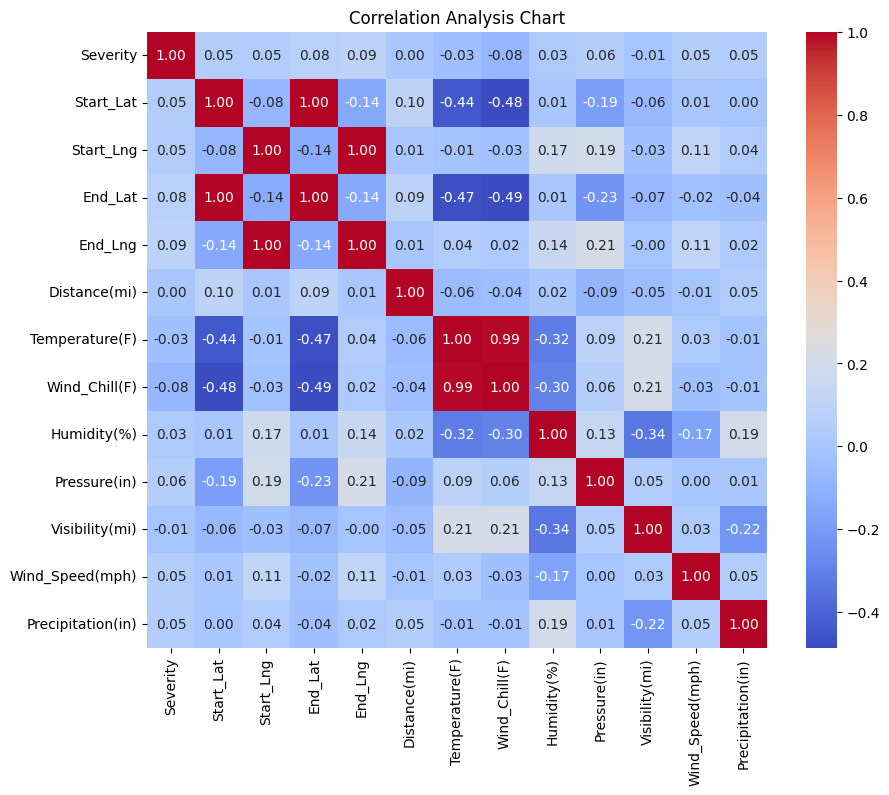

In [31]:
correlation_matrix = dataset_sample[num_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Analysis Chart')
plt.show()

End_Lat and Start_lat have the same values.

The same goes for End_Lng and Start_Lng.

Wind_Chill and Temperature have almost exact correlation.

Some features have a little inverse correlation (ex Temperature & Start_Lng, Wind_Chill & End_Lat, Visibility & Humidity)

In [32]:
def make_scatter_plot(df, feature1, feature2):
    plt.figure(figsize=(8, 6))
    x = df[feature1]
    y = df[feature2]
    plt.scatter(x, y, color='blue', alpha=0.7)
    plt.title(f'{feature1} vs {feature2}')
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.grid(True)
    plt.show()

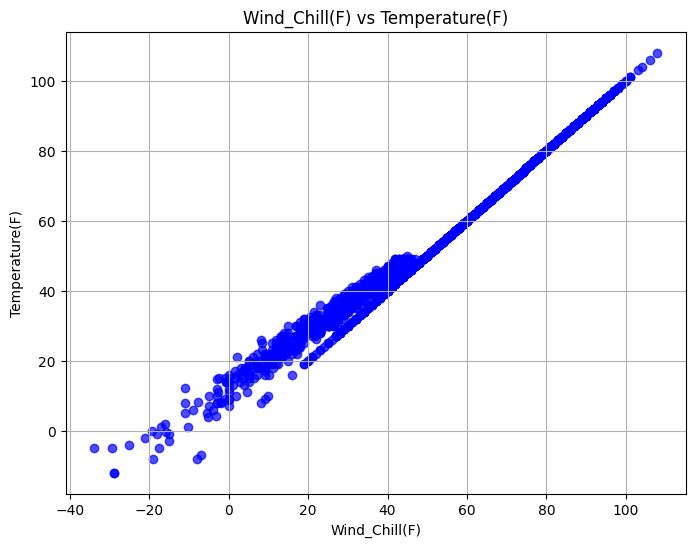

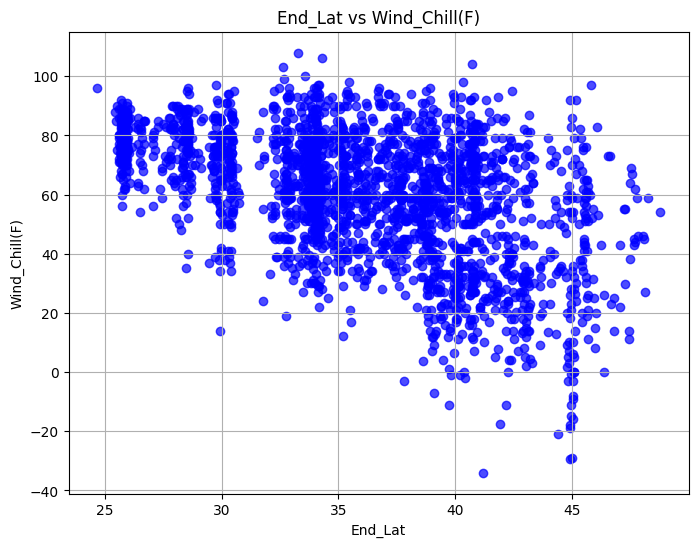

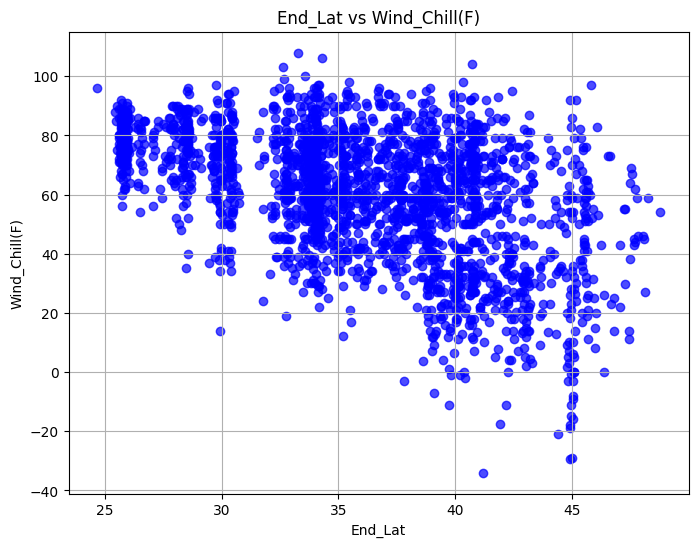

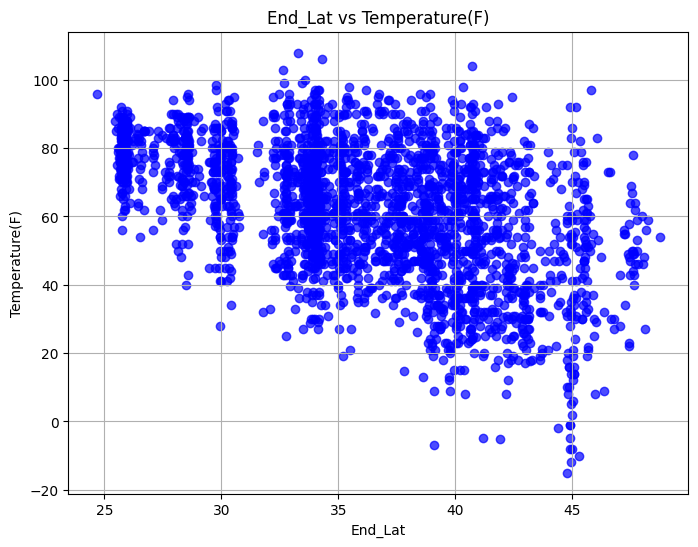

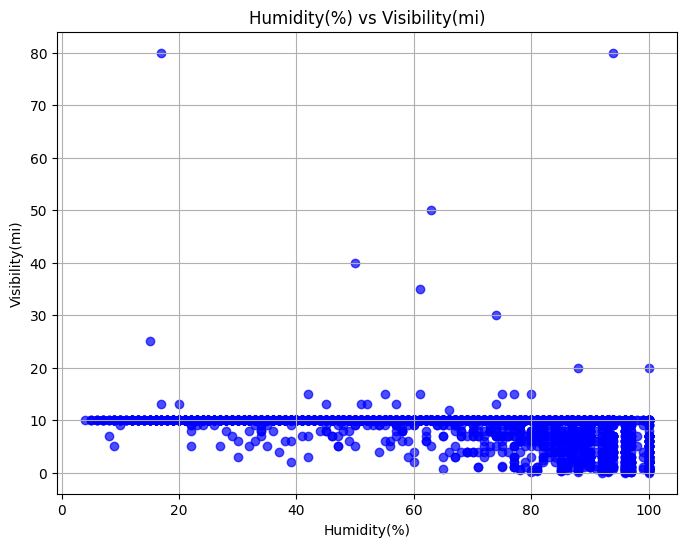

In [33]:
make_scatter_plot(dataset_sample, "Wind_Chill(F)", "Temperature(F)")
make_scatter_plot(dataset_sample, "End_Lat", "Wind_Chill(F)")
make_scatter_plot(dataset_sample, "End_Lat", "Wind_Chill(F)")
make_scatter_plot(dataset_sample, "End_Lat", "Temperature(F)")
make_scatter_plot(dataset_sample, "Humidity(%)", "Visibility(mi)")

### Conclusions
- Start_Lng & End_Lng has a lot of correlation. Since End_Lng also has a lot of null values, it can be removed.
- Start_Lat & End_Lat has a lot of correlation. Since End_Lat also has a lot of null values, it can be removed.
- Wind_Chill & Temperature as a lot of correlation. Since Wind_Chill also has a lot of null values, it can be removed.

## Conclusions for feature analysis
We made the following observations and conclusions:
- The date features for dates need to be split up. One feature for the date, and one feature for the time.
- The minute and second for the time features can be cut out. I think it's better to convert the this hour feature to rather be a category for what time of the day it is: early-morning, mid-day, or late night.
- The descriptions can be handled using vectorization like TF-IDF.
- I can handle the categories by using one-hot encoding.


- The numerical features will have their null values turned into 0.
- The boolean features will have their null values turned into false.
- The categorical have few null values. These null values will be made into their own category.
- The datetime features will later be encoded into numerical values. I think it's appropriate then to turn the null datetime values into 0.


- These seem like they might have outliers: Precipitation, Wind_speed, Visibility, Distance. This can be fixed by normalization.
- For the boolean features, there are a lot more false instances than true instances.
- Turning_Loop can be removed.
- ID and Country should be removed.
- Weather_Condtition categories can be combined

- Start_Lng & End_Lng has a lot of correlation. Since End_Lng also has a lot of null values, it can be removed.
- Start_Lat & End_Lat has a lot of correlation. Since End_Lat also has a lot of null values, it can be removed.
- Wind_Chill & Temperature as a lot of correlation. Since Wind_Chill also has a lot of null values, it can be removed.

# Applying feature engineering
Now let's make the pipeline.
In the pipeline I'm also going to take care of feature conversion to appriproate types, even if this has already been done earlier.

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

Let's first make some functions which we can use in the pipeline

In [35]:
# Numeric

class ConvertToNumeric(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X.apply(pd.to_numeric, errors='coerce')
        return X

In [36]:
# Datetime

class ConvertToDatetime(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        for feature in X.columns:
            X[feature] = pd.to_datetime(X[feature], format='%Y-%m-%d %H:%M:%S', errors='coerce')
        return X


class SplitDatetimeToDateAndTime(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        f_names = []
        for feature in X.columns:
            X[f'{feature}_dt_date'] = X[feature].dt.date
            X[f'{feature}_dt_time'] = X[feature].dt.time
            X[f'{feature}_dt_date'] = pd.to_datetime(X[f'{feature}_dt_date'], format='%Y-%m-%d', errors='coerce')
            X[f'{feature}_dt_time'] = pd.to_datetime(X[f'{feature}_dt_time'], format='%H:%M:%S', errors='coerce')
            f_names.append(feature)

        X = X.drop(f_names, axis=1)
        return X


class EncodeTimeIntoHours():
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        for feature in X.columns:
            if feature.find('_dt_time') != -1:
                X[feature] = X[feature].dt.hour
        return X


class EncodeDate():
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        for feature in X.columns:
            if feature.find('_dt_date') != -1:
                earliest_date = X[feature].min()
                X[feature] = (X[feature] - earliest_date).dt.days
        return X

In [37]:
# Category

class ConvertToObject():
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.astype(object)
        return X



class MergeWeatherConditions():
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        categories_to_merge_within = ['Fair', 'Cloudy', 'Rain', 'Snow', 'Windy', 'Thunder', 'Smoke']
        words_to_merge_into = [
            ['Clear'],['Mist', 'Clouds', 'Cloud', 'Overcast'],
            ['Drizzle', 'Showers', 'Hail', 'Precipitation', 'Pellets', 'Squalls'], ['Wintry', 'Sleet'],
            ['Tornado', 'Fog', 'Haze'], ['T-Storm'], ['Dust', 'Sand']
        ]

        for i in range(7):
            mask = X["Weather_Condition"].str.contains(categories_to_merge_within[i], case=False, na=False)
            X.loc[mask] = categories_to_merge_within[i]

            for category in words_to_merge_into[i]:
                mask = X["Weather_Condition"].str.contains(category, case=False, na=False)
                X.loc[mask] = categories_to_merge_within[i]

        return X



class ConvertToCategory():
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        for i in range(X.shape[1]):
            X[:, i] = pd.Series(X[:, i]).astype('category')
        return X



class CombineRareAndCommonCategories():
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if isinstance(X, pd.DataFrame):
            for feature in X.columns:
                category_counts = X[feature].value_counts(normalize=True)

                # Step 1: Identify categories that occur less than 1%
                rare_categories = category_counts[category_counts < 0.01].index.tolist()

                # Step 2: Replace rare categories with a new category label
                X[feature] = X[feature].apply(lambda x: 'hub_of_few_accidents' if x in rare_categories else x)

                # Step 3: Identify categories that occur more than or equal to 1%
                common_categories = category_counts[category_counts >= 0.01].index.tolist()

                # Step 4: Replace common categories with a new category label
                X[feature] = X[feature].apply(lambda x: 'hub_of_many_accidents' if x in common_categories else x)

            return X
        elif isinstance(X, np.ndarray):
            # Convert numpy array to DataFrame
            X_df = pd.DataFrame(X)

            for feature in X_df.columns:
                category_counts = X_df[feature].value_counts(normalize=True)

                # Step 1: Identify categories that occur less than 1%
                rare_categories = category_counts[category_counts < 0.01].index.tolist()

                # Step 2: Replace rare categories with a new category label
                X_df[feature] = X_df[feature].apply(lambda x: 'hub_of_few_accidents' if x in rare_categories else x)

                # Step 3: Identify categories that occur more than or equal to 1%
                common_categories = category_counts[category_counts >= 0.01].index.tolist()

                # Step 4: Replace common categories with a new category label
                X_df[feature] = X_df[feature].apply(lambda x: 'hub_of_many_accidents' if x in common_categories else x)

            return X_df
        else:
            raise ValueError("Unsupported input type. Only pandas DataFrame and numpy array are supported.")



class CombineRareCategories():
    def __init__(self, percentage):
        self.percentage = percentage

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if isinstance(X, pd.DataFrame):
            for feature in X.columns:
                category_counts = X[feature].value_counts(normalize=True)

                # Step 2: Identify categories that occur less than 1%
                rare_categories = category_counts[category_counts < self.percentage].index.tolist()

                # Step 3: Replace rare categories with a new category label or combine them into a single category
                new_category_label = 'other'
                X[feature] = X[feature].apply(lambda x: new_category_label if x in rare_categories else x)

            return X
        elif isinstance(X, np.ndarray):

            # Assuming X is a numpy array of shape (n_samples, n_features)
            # Convert it to a DataFrame for processing
            X_df = pd.DataFrame(X)
            for feature in X_df.columns:
                category_counts = X_df[feature].value_counts(normalize=True)

                # Step 2: Identify categories that occur less than 1%
                rare_categories = category_counts[category_counts < self.percentage].index.tolist()

                # Step 3: Replace rare categories with a new category label or combine them into a single category
                new_category_label = 'other'
                X_df[feature] = X_df[feature].apply(lambda x: new_category_label if x in rare_categories else x)

            return X_df
        else:
            raise ValueError("Unsupported input type. Only pandas DataFrame and numpy array are supported.")



In [38]:
# Boolean

class TurnNullIntoFalse():
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        for feature in X.columns:
            X[feature] = X[feature].fillna(False)

        return X

In [39]:
class TextVectorizer():
    def __init__(self, feature):
        self.feature = feature
        self.vectorizer = TfidfVectorizer()

    def fit(self, X, y=None):
        self.vectorizer.fit(X[self.feature].astype(str))
        return self

    def transform(self, X):
        transformed_text = self.vectorizer.transform(X[self.feature].astype(str))
        transformed_text_df = pd.DataFrame(transformed_text.toarray(), columns=self.vectorizer.get_feature_names_out())
        X_transformed = pd.concat([X.drop(columns=[self.feature]), transformed_text_df], axis=1)
        return X_transformed

In [40]:
features_to_remove = ['Turning_Loop', 'ID', 'Country', 'End_Lng', 'End_Lat', 'Wind_Chill(F)', 'Street', 'Description', 'Zipcode', 'Airport_Code', 'Timezone']

num_cols = [f for f in num_cols if f not in features_to_remove]
cat_cols = [f for f in cat_cols if f not in features_to_remove]
datetime_cols = [f for f in datetime_cols if f not in features_to_remove]
string_cols = [f for f in string_cols if f not in features_to_remove]
bool_cols = [f for f in bool_cols if f not in features_to_remove]

In [41]:
features_with_many_rare_categories = ['City', 'County']

In [42]:
numeric_pipeline = Pipeline(steps=[
    ('convert_to_numeric', ConvertToNumeric()),
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('scaler', StandardScaler())
])

bool_pipeline = Pipeline(steps=[
    ('turn_null_into_false', TurnNullIntoFalse())
])

datetime_pipeline = Pipeline(steps=[
    ('convert_to_datetime', ConvertToDatetime()),
    ('split_datetime_into_date_and_time', SplitDatetimeToDateAndTime()),
    ('encode_time_into_hours', EncodeTimeIntoHours()),
    ('encode_date', EncodeDate()),
    ('convert_null_to_0', SimpleImputer(strategy='constant', fill_value=0))
])

category_pipeline = Pipeline(steps=[
    ('convert_to_object', ConvertToObject()),
    ('merge_null_into_category', SimpleImputer(strategy='constant', fill_value='null_cat')),
    ('combine_rare_categories', CombineRareCategories(0.10)),
    ('encode_categories', OrdinalEncoder()),
    ('one_hot_encoding', OneHotEncoder(handle_unknown='ignore')),
])

rare_category_pipeline = Pipeline(steps=[
    ('convert_to_object', ConvertToObject()),
    ('merge_null_into_category', SimpleImputer(strategy='constant', fill_value='null_cat')),
    ('combine_rare_and_common_categories', CombineRareAndCommonCategories()),
    ('encode_categories', OrdinalEncoder()),
    ('one_hot_encoding', OneHotEncoder(handle_unknown='ignore'))
])

weather_pipeline = Pipeline(steps=[
    ('convert_to_object', ConvertToObject()),
    ('merge_weather_conditions', MergeWeatherConditions()),
    ('merge_null_into_category', SimpleImputer(strategy='constant', fill_value='null_cat')),
    ('combine_rare_categories', CombineRareCategories(0.10)),
    ('encode_categories', OrdinalEncoder()),
    ('one_hot_encoding', OneHotEncoder(handle_unknown='ignore'))
])

text_transfromer = Pipeline(steps=[
    ('tfidf', TfidfVectorizer())
])




column_transformer = ColumnTransformer(transformers=[
    ('remove_features', 'drop', features_to_remove),
    ('merge_weather_conditions', weather_pipeline, ["Weather_Condition"]),
    ('category_pipeline', category_pipeline, [col for col in cat_cols if (col != "Weather_Condition") and (col not in features_with_many_rare_categories)] ),
    ('rare_category_pipeline', rare_category_pipeline, features_with_many_rare_categories),
    ('numeric_pipeline', numeric_pipeline, [f for f in num_cols if f != target]),
    ('boolean_pipeline', bool_pipeline, bool_cols),
    ('datetime_pipeline', datetime_pipeline, datetime_cols)
    #('text_pipeline', text_transfromer, ['Description'])
])

In [43]:
# Pipeline overview

column_transformer

ColumnTransformer(transformers=[('remove_features', 'drop',
                                 ['Turning_Loop', 'ID', 'Country', 'End_Lng',
                                  'End_Lat', 'Wind_Chill(F)', 'Street',
                                  'Description', 'Zipcode', 'Airport_Code',
                                  'Timezone']),
                                ('merge_weather_conditions',
                                 Pipeline(steps=[('convert_to_object',
                                                  <__main__.ConvertToObject object at 0x7c0cc6bc4b20>),
                                                 ('merge_weather_conditions',
                                                  <__main__.MergeWeathe...
                                 Pipeline(steps=[('convert_to_datetime',
                                                  ConvertToDatetime()),
                                                 ('split_datetime_into_date_and_time',
                                                  SplitDatetimeToDateAndTime()),
                                                 ('encode_time_into_hours',
                                                  <__main__.EncodeTimeIntoHours object at 0x7c0cc6bc4670>),
                                                 ('encode_date',
                                                  <__main__.EncodeDate object at 0x7c0cc6bc5570>),
                                                 ('convert_null_to_0',
                                                  SimpleImputer(fill_value=0,
                                                                strategy='constant'))]),
                                 ['Start_Time', 'End_Time',
                                  'Weather_Timestamp'])])

## Results of feature engineering
Here I'll show some of the results on the data from the pipeline.
I'll show how the datetime features end up, and how the weather conditions are merged.

### Results of datetime feature engineering

In [44]:
datetime_df = datetime_pipeline.fit_transform(dataset_sample[datetime_cols].copy())
pd.DataFrame(datetime_df).head()

# Column 0, 2 and 4 represents days since the earliest day in the dataset
# Column 1, 3 and 5 representes an hour

,0,1,2,3,4,5
0,2078.0,8.0,2078.0,11.0,2077.0,8.0
1,1643.0,15.0,1643.0,16.0,1642.0,15.0
2,1604.0,6.0,1604.0,7.0,1603.0,6.0
3,1729.0,2.0,1729.0,4.0,1728.0,1.0
4,1828.0,18.0,1828.0,19.0,1827.0,18.0


### Results of merging weather conditions

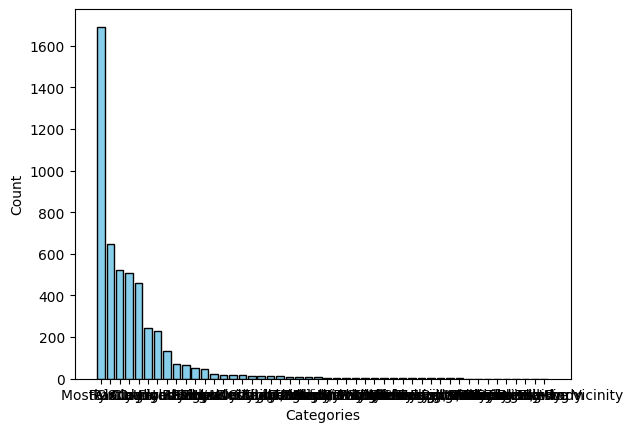

In [45]:
# Weather conditions before applying merging
# There are a ton of categories

category_counts = dataset_sample['Weather_Condition'].value_counts()
plt.bar(category_counts.index, category_counts.values, color='skyblue', edgecolor='black')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.show()

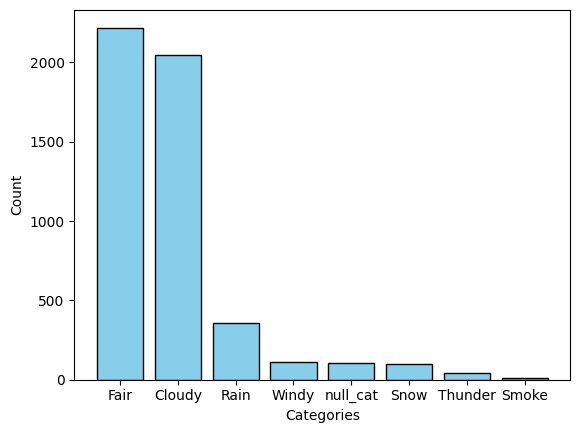

In [46]:
# Weather conditions after merging

# defining the peipeline for Weather_Condition.
# Im not including the steps for label encoding, onehot encoding
merge_pipeline = Pipeline(steps=[
    ('convert_to_object', ConvertToObject()),
    ('merge_weather_conditions', MergeWeatherConditions()),
    ('merge_null_into_category', SimpleImputer(strategy='constant', fill_value='null_cat')),

])

# applying the pipeline
weather_df = merge_pipeline.fit_transform(dataset_sample[["Weather_Condition"]].copy())
weather_df = pd.DataFrame(weather_df)

# making the plot
category_counts = weather_df[0].value_counts()
plt.bar(category_counts.index, category_counts.values, color='skyblue', edgecolor='black')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.show()

### Results of merging rare categories

In [47]:
merge_rare_cat_pipeline = Pipeline(steps=[
    ('convert_to_object', ConvertToObject()),
    ('merge_null_into_category', SimpleImputer(strategy='constant', fill_value='null_cat')),
    ('combine_rare_categories', CombineRareCategories(0.5))
])

print(dataset_sample[[col for col in cat_cols if (col != "Weather_Condition") and (col not in features_with_many_rare_categories)]].info())

merged_rare_c_df = merge_rare_cat_pipeline.fit_transform(dataset_sample[[col for col in cat_cols if (col != "Weather_Condition") and (col not in features_with_many_rare_categories)]].copy())
merged_rare_c_df = pd.DataFrame(merged_rare_c_df)

for c_feature in merged_rare_c_df.columns:
    other_percentage = (merged_rare_c_df[c_feature].value_counts(normalize=True).get('other', 0)) * 100
    print(f'{c_feature} : {other_percentage}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Source                 5000 non-null   category
 1   State                  5000 non-null   category
 2   Wind_Direction         4871 non-null   category
 3   Sunrise_Sunset         4987 non-null   category
 4   Civil_Twilight         4987 non-null   category
 5   Nautical_Twilight      4987 non-null   category
 6   Astronomical_Twilight  4987 non-null   category
dtypes: category(7)
memory usage: 37.1 KB
None
0 : 44.16
1 : 100.0
2 : 100.0
3 : 30.240000000000002
4 : 25.679999999999996
5 : 20.979999999999997
6 : 17.080000000000002


### Results of merging rare and common categories

In [48]:
combine_common_and_rare_cat_pipeline = Pipeline(steps=[
    ('convert_to_object', ConvertToObject()),
    ('merge_null_into_category', SimpleImputer(strategy='constant', fill_value='null_cat')),
    ('combine_rare_and_common_categories', CombineRareAndCommonCategories())
])

print(dataset_sample[features_with_many_rare_categories].info())

merged_rare_common_c_df = combine_common_and_rare_cat_pipeline.fit_transform(dataset_sample[features_with_many_rare_categories].copy())
merged_rare_common_c_df = pd.DataFrame(merged_rare_common_c_df)

for c_feature in merged_rare_common_c_df.columns:
    many_percentage = (merged_rare_common_c_df[c_feature].value_counts(normalize=True).get('hub_of_many_accidents', 0)) * 100
    few_percentage = (merged_rare_common_c_df[c_feature].value_counts(normalize=True).get('hub_of_few_accidents', 0)) * 100

    print(f'{c_feature} : {many_percentage} - hub_of_many_accidents')
    print(f'{c_feature} : {few_percentage} - hub_of_few_accidents')


merged_rare_common_c_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   City    5000 non-null   category
 1   County  5000 non-null   category
dtypes: category(2)
memory usage: 118.1 KB
None
0 : 15.32 - hub_of_many_accidents
0 : 84.68 - hub_of_few_accidents
1 : 34.74 - hub_of_many_accidents
1 : 65.25999999999999 - hub_of_few_accidents


,0,1
0,hub_of_few_accidents,hub_of_few_accidents
1,hub_of_few_accidents,hub_of_few_accidents
2,hub_of_few_accidents,hub_of_few_accidents
3,hub_of_many_accidents,hub_of_many_accidents
4,hub_of_few_accidents,hub_of_few_accidents


# Using models
I will be using the following models:

RandomForest, NearestNeighbours, AdaBoost.

I'll also be using the ensembler VotingClassifier.

## Defining and running the models

In [50]:
# Splitting dataset
from sklearn.model_selection import train_test_split
y = dataset_sample[target]
X = dataset_sample.drop(columns=target, axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [51]:
# Random forest
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


param_grid = {
    'classifier__n_estimators': [100],
    'classifier__criterion': ['gini', 'entropy', 'log_loss'],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 3, 5]
}

pipeline = Pipeline([
    ('preprocessor', column_transformer),
    ('classifier', RandomForestClassifier())
])


grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

rf_best_model = grid_search.best_estimator_
rf_y_pred = rf_best_model.predict(X_test)

In [52]:
# NearestNeighbours
from sklearn.neighbors import KNeighborsClassifier

param_grid = {
    'classifier__n_neighbors': [5, 10],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'classifier__leaf_size': [30, 20, 40]
}

pipeline = Pipeline([
    ('preprocessor', column_transformer),
    ('classifier', KNeighborsClassifier())
])


grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

kn_best_model = grid_search.best_estimator_
kn_y_pred = kn_best_model.predict(X_test)

In [53]:
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier

param_grid = {
    'classifier__n_estimators': [50, 40, 70],
    'classifier__learning_rate': [1.0, 0.1, 0.01],
    'classifier__algorithm': ['SAMME', 'SAMME.R'],
}

pipeline = Pipeline([
    ('preprocessor', column_transformer),
    ('classifier', AdaBoostClassifier())
])


grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

ada_best_model = grid_search.best_estimator_
ada_y_pred = ada_best_model.predict(X_test)

In [54]:
# VotingClassifier
from sklearn.ensemble import VotingClassifier


classifier = VotingClassifier(
    estimators=[('rf', rf_best_model), ('kn', kn_best_model), ('ada', ada_best_model)],
    voting='soft'
)

classifier.fit(X_train, y_train)
voting_y_pred = classifier.predict(X_test)

## Best parameters

In [55]:
# Best parameters
models = [rf_best_model, kn_best_model, ada_best_model]

for model, name in zip(models, ["RF", "KN", "ADA"]):
    print(name)
    model_params = model.named_steps['classifier'].get_params()
    for param, value in model_params.items():
        print(f"{param}: {value}")
    print("------------")

RF
bootstrap: True
ccp_alpha: 0.0
class_weight: None
criterion: entropy
max_depth: None
max_features: sqrt
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 5
min_weight_fraction_leaf: 0.0
n_estimators: 100
n_jobs: None
oob_score: False
random_state: None
verbose: 0
warm_start: False
------------
KN
algorithm: auto
leaf_size: 30
metric: minkowski
metric_params: None
n_jobs: None
n_neighbors: 10
p: 2
weights: uniform
------------
ADA
algorithm: SAMME
base_estimator: deprecated
estimator: None
learning_rate: 0.1
n_estimators: 70
random_state: None
------------


## Metrics

In [56]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


scores = {}

preds = [rf_y_pred, kn_y_pred, ada_y_pred, voting_y_pred]

for pred, name in zip(preds, ["RF", "KN", "ADA", "Voting"]):
    accuracy = accuracy_score(y_test, pred)
    f1 = f1_score(y_test, pred, average='weighted')  # 'weighted' for multi-class classification
    precision = precision_score(y_test, pred, average='weighted')
    recall = recall_score(y_test, pred, average='weighted')
    scores[name] = [accuracy, f1, precision, recall]

for score in scores:
    print(f"{score}: accuracy: {scores[score][0]}, f1: {scores[score][1]}, precision: {scores[score][2]}, recall: {scores[score][3]}")

RF: accuracy: 0.8096, f1: 0.7816732672291015, precision: 0.7720409755253826, recall: 0.8096
KN: accuracy: 0.7896, f1: 0.7135243243243244, precision: 0.6911902040816326, recall: 0.7896
ADA: accuracy: 0.796, f1: 0.7055857461024498, precision: 0.6336160000000001, recall: 0.796
Voting: accuracy: 0.8, f1: 0.7280894724736761, precision: 0.7398026646556058, recall: 0.8


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
